In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import euclidean_distances

iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
columns= iris['feature_names'] + ['target'])
print('Data shape:', df.shape)
print('Target classes:', df['target'].unique()) 
print('Sample data: \n')
df.head()

Data shape: (150, 5)
Target classes: [0. 1. 2.]
Sample data: 



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [85]:
X = iris['data'][:,:2] # only use 2 first features
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023, stratify=y)
print('Training data shape: ', X_train.shape) 
print('Test data shape: ', X_test.shape)

Training data shape:  (105, 2)
Test data shape:  (45, 2)


Accuracy: 0.8


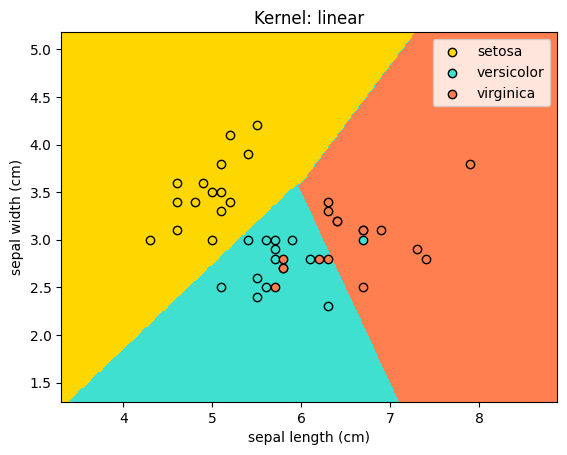

In [86]:
def fit_predict(model, X_train, y_train, X_test, y_test): # Train the support vector classifier 
  model.fit(X_train, y_train)
  # Predict the test data
  y_pred = model.predict(X_test)
  # Calculate the accuracy
  acc = accuracy_score(y_test, y_pred)
  print('Accuracy:', round(acc, 3))

def plot_decision_boundary(model, X, y, kernel_name):
  colors = {'setosa': 'gold', 'versicolor': 'turquoise', 'virginica': 'coral'}
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  # create meshgrid between min and max at interval 0.02
  x_grid, y_grid = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
    # predict all meshgrid points to plot the decision boundary
  predictions = model.predict(np.c_[x_grid.flatten(), y_grid.flatten()]) 
  predictions = predictions.reshape(x_grid.shape)
  plt.contourf(x_grid, y_grid, predictions, levels=2, colors=list(colors.values()))
  # Put the test set ground truth in the graph
  for i, (label, color) in enumerate(colors.items()):
      plt.scatter(X[:, 0][y==i], X[:, 1][y==i], c=color, label=label, edgecolors='k')
  plt.title(f'Kernel: {kernel_name}') 
  plt.xlabel('sepal length (cm)') 
  plt.ylabel('sepal width (cm)') 
  plt.legend()
  plt.show()

model = svm.SVC(kernel='linear')
fit_predict(model, X_train, y_train, X_test, y_test)

plot_decision_boundary(model, X_test, y_test, 'linear')



Accuracy: 0.778


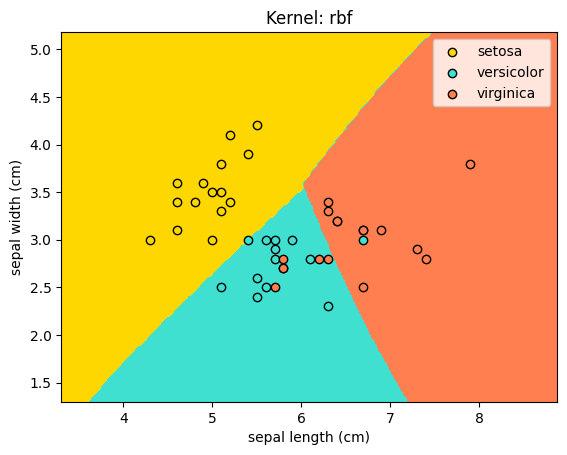

Accuracy: 0.8


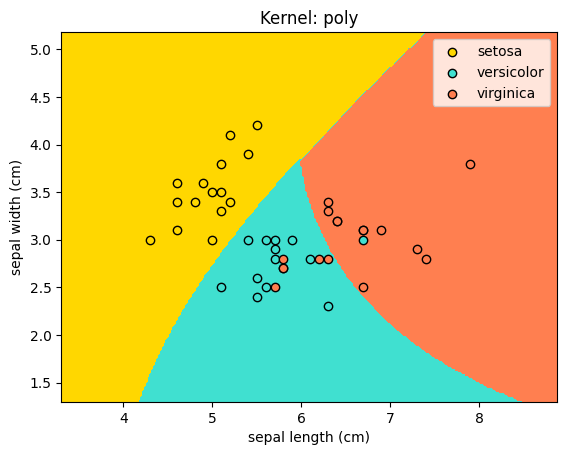

Accuracy: 0.267


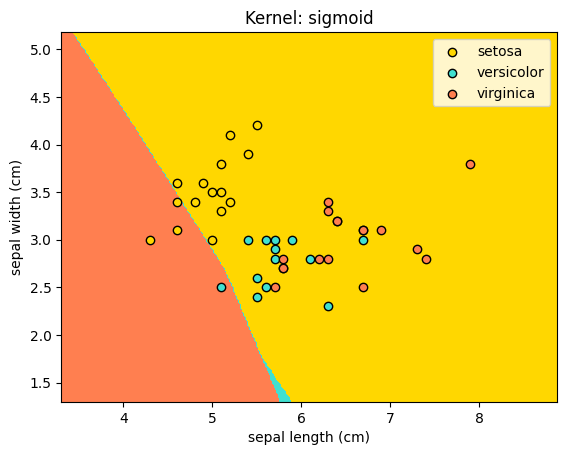

In [87]:
kernels=['rbf','poly','sigmoid']
for kernel in kernels:
    model = svm.SVC(kernel=kernel)
    fit_predict(model, X_train, y_train, X_test, y_test)
    plot_decision_boundary(model, X_test, y_test, kernel)

Accuracy: 0.8


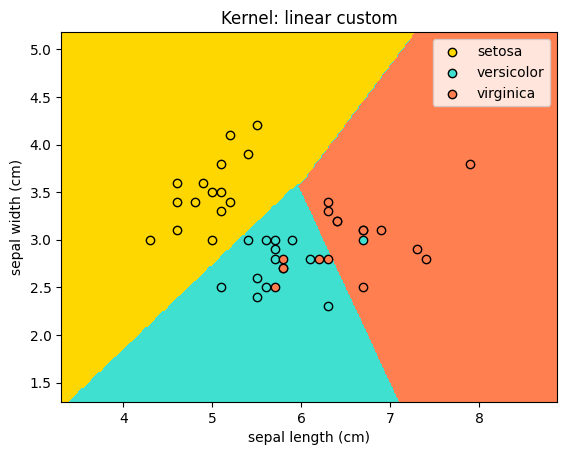

In [88]:
def linear_kernel(x, x_): 
  return np.dot(x, x_.T)

def linear_kernel(x, x_):
  result = np.empty((x.shape[0], x_.shape[0])) 
  for i in range(len(x)):
        for j in range(len(x_)):
            result[i][j] = np.dot(x[i], x_[j])
  return result

model = svm.SVC(kernel=linear_kernel)
fit_predict(model, X_train, y_train, X_test, y_test) 
plot_decision_boundary(model, X_test, y_test, 'linear custom')

Accuracy: 0.8


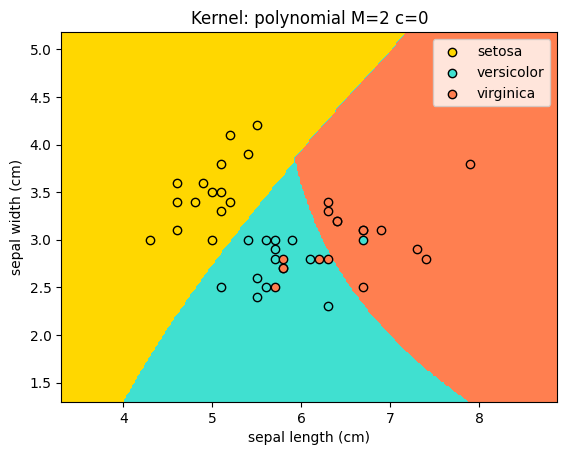

Accuracy: 0.733


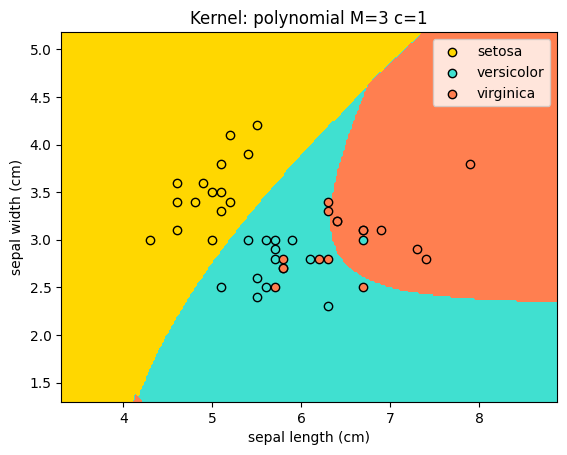

Accuracy: 0.778


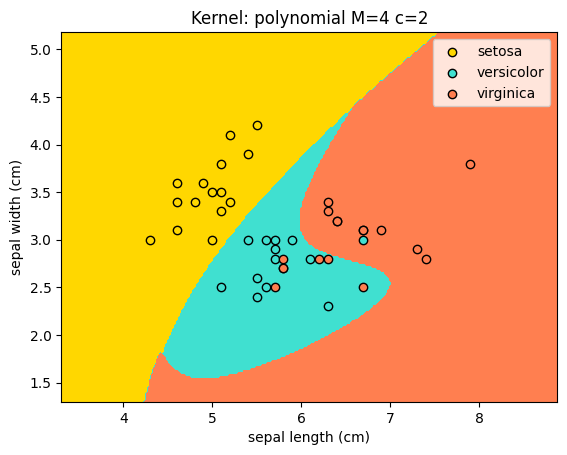

Accuracy: 0.844


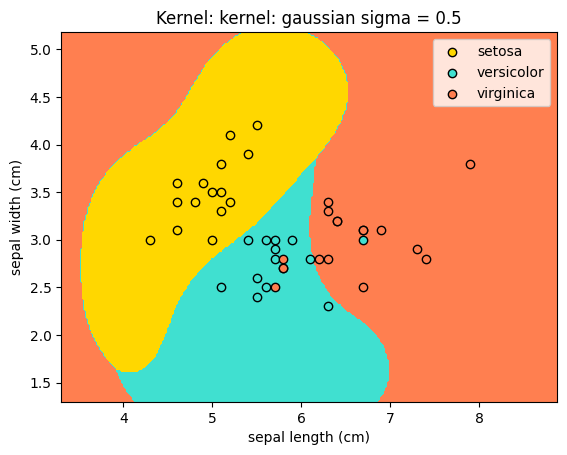

Accuracy: 0.822


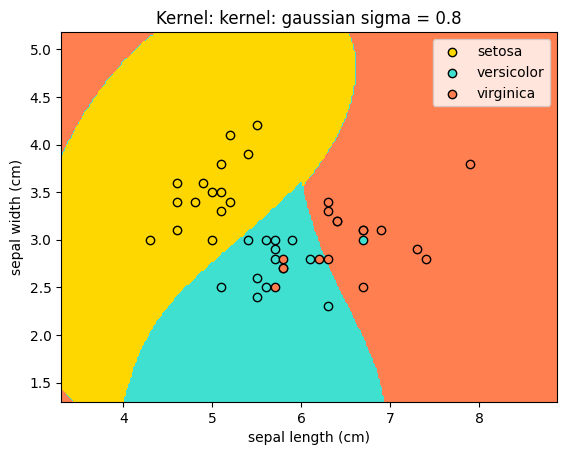

In [89]:
#Exercise15 - 1
def polynomial_kernel(x, x_, c, M):
    return (np.dot(x, x_.T) + c) ** M
    
model = svm.SVC(kernel=lambda x, x_: polynomial_kernel(x, x_, c=0, M=2))
fit_predict(model, X_train, y_train, X_test, y_test)
plot_decision_boundary(model, X_test, y_test, 'polynomial M=2 c=0')

model = svm.SVC(kernel=lambda x, x_: polynomial_kernel(x, x_, c=1, M=3))
fit_predict(model, X_train, y_train, X_test, y_test)
plot_decision_boundary(model, X_test, y_test, 'polynomial M=3 c=1')

model = svm.SVC(kernel=lambda x, x_: polynomial_kernel(x, x_, c=2, M=4))
fit_predict(model, X_train, y_train, X_test, y_test)
plot_decision_boundary(model, X_test, y_test, 'polynomial M=4 c=2')

#Exercise15 - 2
def gaussian_kernel(x, x_, sigma):
    squared_norm = euclidean_distances(x, x_, squared=True)
    return np.exp(-squared_norm / (2 * sigma ** 2))

model = svm.SVC(kernel=lambda x, x_: gaussian_kernel(x, x_, sigma=0.5))
fit_predict(model, X_train, y_train, X_test, y_test)
plot_decision_boundary(model, X_test, y_test, 'kernel: gaussian sigma = 0.5')

model = svm.SVC(kernel=lambda x, x_: gaussian_kernel(x, x_, sigma=0.8))
fit_predict(model, X_train, y_train, X_test, y_test)
plot_decision_boundary(model, X_test, y_test, 'kernel: gaussian sigma = 0.8')
